In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix


In [2]:
df = pd.read_csv('./Crop_Classificaion.csv')


In [3]:
X = df.iloc[:, :-1]  
y = df.iloc[:, -1]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
# Create a RandomForestClassifier instead of RandomForestRegressor
rf_clf = RandomForestClassifier(n_estimators=400,max_depth=10, min_samples_split=10, max_features=2, random_state=42)
rf_clf.fit(X_train, y_train)

y_pred = rf_clf.predict(X_test)

# Generate a classification report
report = classification_report(y_test, y_pred, output_dict=True, zero_division=1)


In [6]:
accuracy = report['accuracy']
precision = report['macro avg']['precision']
recall = report['macro avg']['recall']
f1_score = report['macro avg']['f1-score']

print(f"Accuracy : {accuracy}")
print(f"Precision : {precision}")
print(f"Recall : {recall}")
print(f"F1-score : {f1_score}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division=1))

Accuracy : 0.9931818181818182
Precision : 0.9925757575757576
Recall : 0.9933213716108454
F1-score : 0.9926374055074331
[[23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 27  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 11  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 19  0  0  0  0 

In [10]:
import matplotlib.pyplot as plt

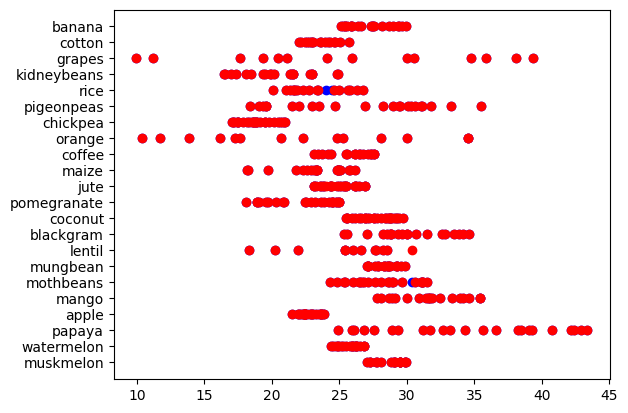

In [16]:
plt.scatter(X_test.temperature,y_test,color='blue')
plt.scatter(X_test.temperature,y_pred,color='red')

In [31]:
import joblib

In [32]:
# Save the model
model_filename = './Save_Model/random_forest_classifier_model.pkl'
joblib.dump(rf_clf, model_filename)
print(f"Model saved as {model_filename}")

# To load the model and make predictions
loaded_model = joblib.load(model_filename)
new_data = pd.DataFrame({
    'N': [78],
    'P': [48],
    'K': [22],
    'temperature': [23.08974909],
    'humidity': [63.10459626],
    'ph': [5.588650585],
    'rainfall': [70.43473609]
})
crop_predictions = loaded_model.predict(new_data)

print("Predicted Crop:", crop_predictions[0])


Model saved as ./Save_Model/random_forest_classifier_model.pkl
Predicted Crop: maize
